# PROJECT BY: **SYEDA UMAIMA TAMKEEN**

__________________________________________________________________________________________________________________________________________________________________________________

# **Project Title: Image Processing Tasks using OpenCV**

**Summary:**
In this project, various image processing techniques were applied to an image using OpenCV. The tasks ranged from basic operations like gray-scaling, image translation, and rotation to more complex ones such as edge detection using the Canny algorithm and applying Gaussian blur. The goal of the project was to understand and implement essential image processing functions and visualize their effects on the images.

> **Key Steps:**

### **1. Gray-scaling and Color Channel Separation:**

- Converted a colored image to grayscale using `cv2.cvtColor()`.
- Separated the image into red, green, and blue color channels using `cv2.split()`.
- Visualized the grayscale image and the individual color channels using Matplotlib.

**Code Summary:**
Used OpenCV’s `cvtColor` for gray-scaling and `split` to separate color channels, displaying the results using Matplotlib.

### **2. Image Translation:**

- Shifted the image along the x-axis (100 pixels) and y-axis (50 pixels) using a translation matrix.
- Applied the translation matrix to the image using `cv2.warpAffine()`.

**Code Summary:**
Implemented image translation using the transformation matrix and OpenCV’s `warpAffine()`.

### **3. Image Rotation:**

- Rotated the image by 90, 180, 270, and 360 degrees.
- Used `cv2.getRotationMatrix2D()` to compute the rotation matrix and `cv2.warpAffine()` to apply the rotations.

**Code Summary:**
Rotated the image by various angles and visualized the results using Matplotlib.

### **4. Scaling and Resizing:**

- Scaled the image to 15% of its original size using linear interpolation.
- Enlarged the image to twice its original size using cubic interpolation.
- Resized the image to a specific size (200x400 pixels) using area interpolation.

**Code Summary:**
Resized and scaled the image using different interpolation methods, displaying the results side by side.

### **5. Gaussian Blur:**

- Applied a Gaussian blur to the image with a kernel size of (15, 15) using `cv2.GaussianBlur()`.

**Code Summary:**
Blurring was achieved using OpenCV’s Gaussian Blur function to reduce noise and smooth the image.

### **6. Adjusting Brightness and Contrast:**

- Adjusted the brightness and contrast of the image using `cv2.convertScaleAbs()`, with alpha (contrast control) set to 1.5 and beta (brightness control) set to 50.

**Code Summary:**
Brightness and contrast adjustments were made using OpenCV’s `convertScaleAbs()` to achieve desired image enhancement.

### **7. Cropping the Image:**

- Cropped a specific region (starting at [50, 50] with dimensions 200x200) from the image using array slicing.

**Code Summary:**
The image was successfully cropped using numpy slicing, and the result was displayed using Matplotlib.

### **8. Drawing a Circle on the Image:**

- Drew a circle on the center of the image with a radius of 50 pixels and green color, using `cv2.circle()`.

**Code Summary:**
A green circle was drawn at the center of the image using OpenCV’s `circle()` function, with the result visualized using Matplotlib.

### **9. Canny Edge Detection:**

- Applied Canny edge detection to the image using `cv2.Canny()` with threshold values 100 and 200 to detect edges.

**Code Summary:**
Edges were successfully detected using the Canny algorithm, with the results displayed in grayscale.

### **10. Smart Surveillance System (Image Processing Pipeline):**

- Implemented a combination of image enhancement, Gaussian blur, and Canny edge detection to process images for a surveillance system.

**Code Summary:**
A pipeline of image processing techniques was applied, combining contrast/brightness adjustment, Gaussian blur, and Canny edge detection, and visualized the final results.

### **11. Histogram Analysis:**

- Computed and visualized histograms for the grayscale, blue, and green channels of the image.

**Code Summary:**
Histograms for grayscale and individual color channels were plotted using OpenCV’s `calcHist()` function and Matplotlib.

### **12. Linear Spatial Filtering:**

- Applied a Sobel filter to detect edges using `cv2.filter2D()` and a custom edge-detection kernel.

**Code Summary:**
Sobel edge detection was performed using `filter2D()` to highlight the edges in the image.

> ### **Results:**

The project successfully implemented a range of image processing techniques, including:
- Gray-scaling and color separation.
- Image translation and rotation.
- Image scaling, resizing, and Gaussian blurring.
- Edge detection using the Canny algorithm.
- Histogram analysis and linear filtering using Sobel edge detection.

The visualizations provided a clear understanding of the impact of these techniques on the images.

>###  **Conclusion:**

This project demonstrates the practical application of image processing techniques using OpenCV. Each task illustrated a fundamental operation in computer vision, laying the groundwork for more advanced applications such as image classification, object detection, and smart surveillance systems. The successful implementation of these techniques shows the robustness of OpenCV as a tool for real-world image processing tasks.


# **Gray-scaling and Color Channel Separation in OpenCV**

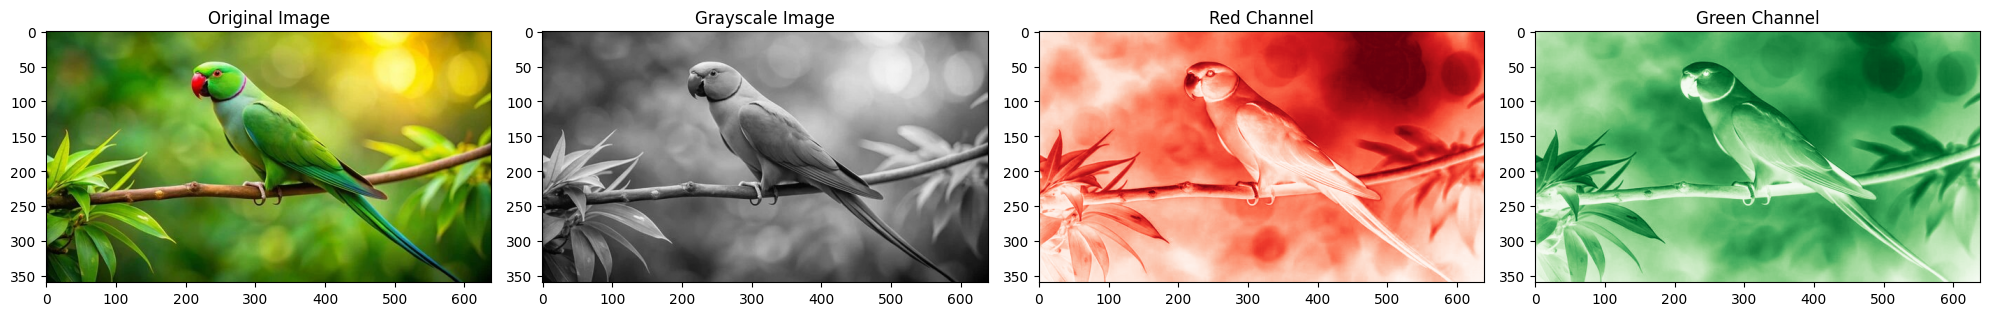

In [3]:
import cv2
import matplotlib.pyplot as plt

# Use correct path
image = cv2.imread('/content/indian-parrot_905855fc-e32a-444b-9965-203d5ab678c6.jpg')

# Check if image is loaded
if image is None:
    raise ValueError("Image not found. Check the file path!")

# Convert to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Split channels
blue_channel, green_channel, red_channel = cv2.split(image)

# Plot
fig, ax = plt.subplots(1, 4, figsize=(20, 5))

ax[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
ax[0].set_title("Original Image")

ax[1].imshow(gray_image, cmap='gray')
ax[1].set_title("Grayscale Image")

ax[2].imshow(red_channel, cmap='Reds')
ax[2].set_title("Red Channel")

ax[3].imshow(green_channel, cmap='Greens')
ax[3].set_title("Green Channel")

plt.tight_layout()
plt.show()


# **Image Translation**

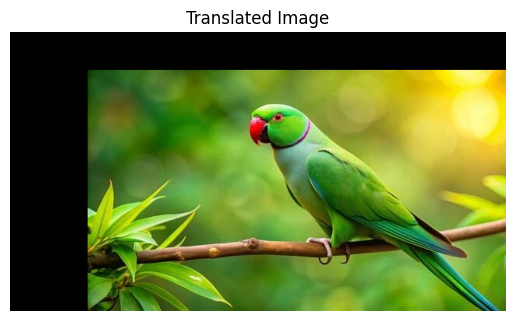

In [4]:
import numpy as np

translation_matrix = np.float32([[1, 0, 100], [0, 1, 50]])

rows, cols = image.shape[:2]


translated_image = cv2.warpAffine(image, translation_matrix, (cols, rows))

plt.imshow(cv2.cvtColor(translated_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Translated Image')
plt.show()


# **Image Rotation**

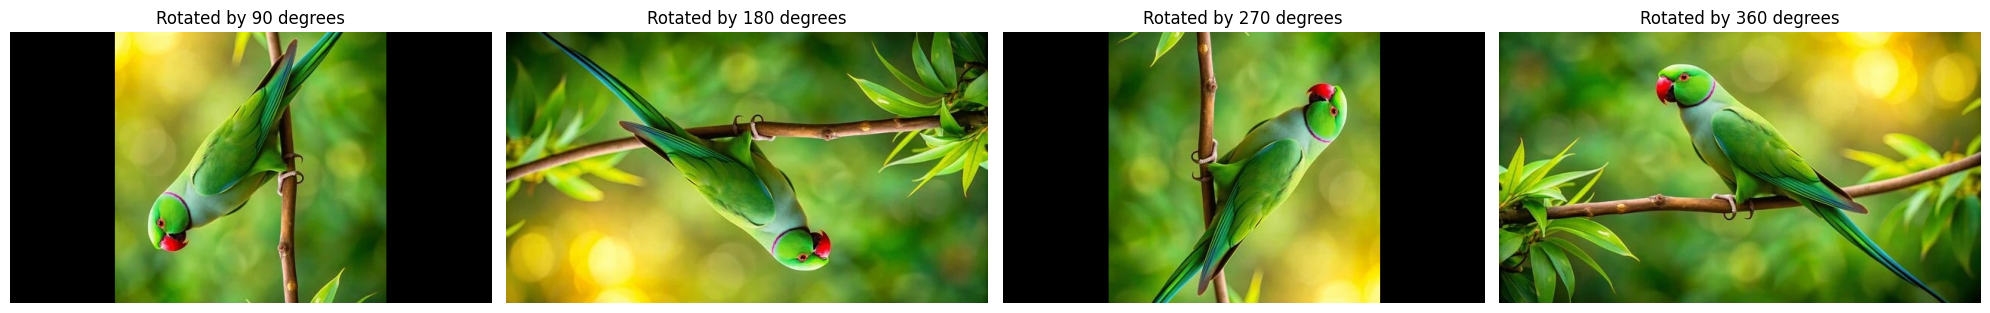

In [5]:

center = (cols // 2, rows // 2)

angles = [90, 180, 270, 360]
rotated_images = []

for angle in angles:
    rotation_matrix = cv2.getRotationMatrix2D(center, angle, 1)
    rotated_image = cv2.warpAffine(image, rotation_matrix, (cols, rows))
    rotated_images.append(rotated_image)

fig, ax = plt.subplots(1, 4, figsize=(20, 5))
for i, angle in enumerate(angles):
    ax[i].imshow(cv2.cvtColor(rotated_images[i], cv2.COLOR_BGR2RGB))
    ax[i].set_title(f'Rotated by {angle} degrees')
    ax[i].axis('off')

plt.tight_layout()
plt.show()


# **Scaling and Resizing using OpenCV**

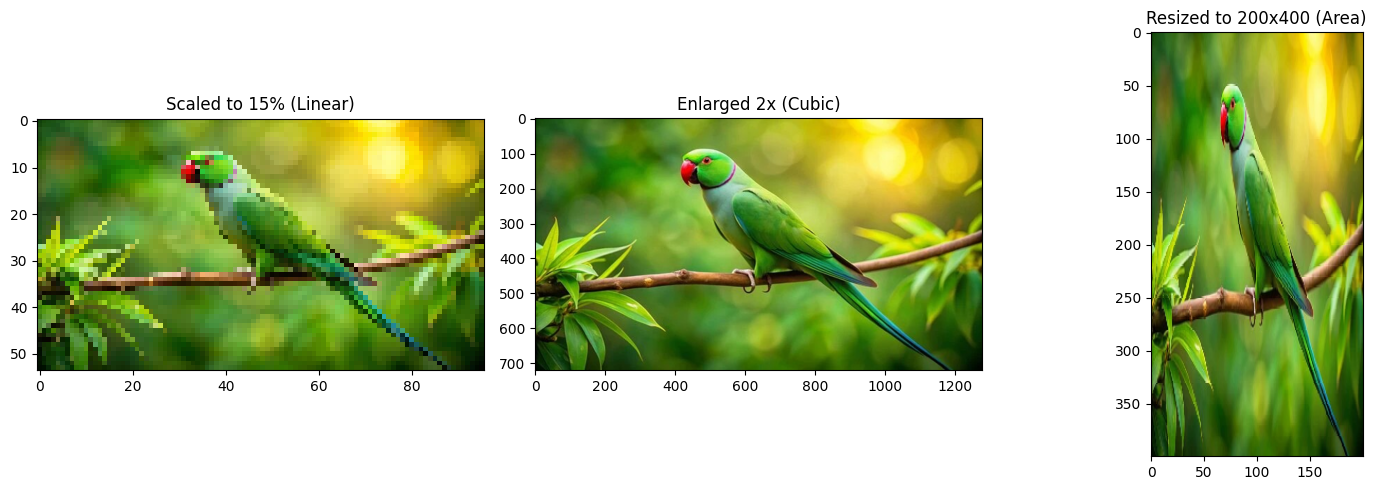

In [6]:
scaled_image = cv2.resize(image, None, fx=0.15, fy=0.15, interpolation=cv2.INTER_LINEAR)

enlarged_image = cv2.resize(image, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)

resized_image = cv2.resize(image, (200, 400), interpolation=cv2.INTER_AREA)

fig, ax = plt.subplots(1, 3, figsize=(15, 5))

ax[0].imshow(cv2.cvtColor(scaled_image, cv2.COLOR_BGR2RGB))
ax[0].set_title("Scaled to 15% (Linear)")

ax[1].imshow(cv2.cvtColor(enlarged_image, cv2.COLOR_BGR2RGB))
ax[1].set_title("Enlarged 2x (Cubic)")

ax[2].imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
ax[2].set_title("Resized to 200x400 (Area)")

plt.tight_layout()
plt.show()


# **Image Blur using OpenCV**

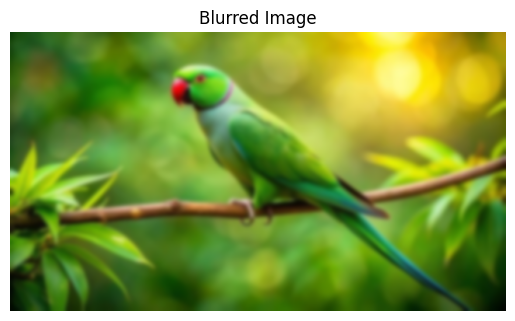

In [7]:
blurred_image = cv2.GaussianBlur(image, (15, 15), 0)

plt.imshow(cv2.cvtColor(blurred_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Blurred Image')
plt.show()


# **Adjust Image Brightness and Contrast in OpenCV**

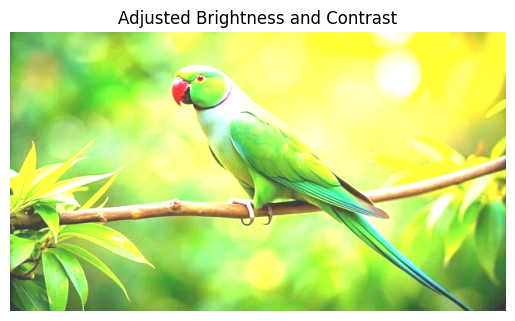

In [8]:
image_float = np.float32(image)

alpha = 1.5
beta = 50


adjusted_image = cv2.convertScaleAbs(image_float, alpha=alpha, beta=beta)

adjusted_image_rgb = cv2.cvtColor(adjusted_image, cv2.COLOR_BGR2RGB)

plt.imshow(adjusted_image_rgb)
plt.axis('off')
plt.title('Adjusted Brightness and Contrast')
plt.show()


# **Crop a Specific Region of an Image in OpenCV**

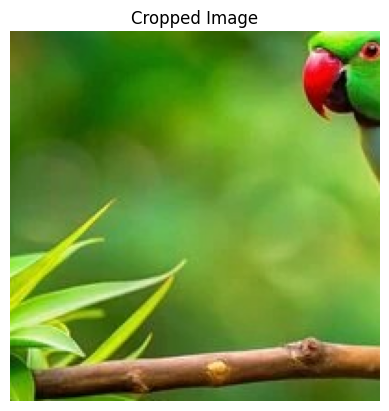

In [9]:
startX, startY = 50, 50
width, height = 200, 200

cropped_image = image[startY:startY + height, startX:startX + width]

cropped_image_rgb = cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB)

plt.imshow(cropped_image_rgb)
plt.axis('off')
plt.title('Cropped Image')
plt.show()


# **Draw a Circle on an Image in OpenCV**

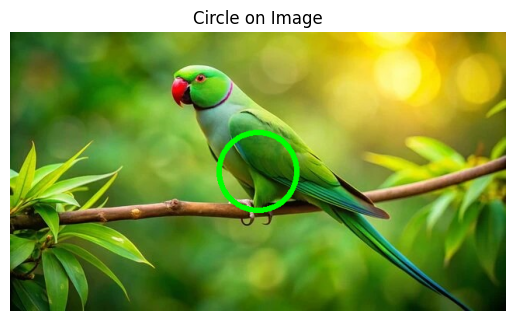

In [10]:
rows, cols = image.shape[:2]
center = (cols // 2, rows // 2)

circle_image = image.copy()
cv2.circle(circle_image, center, 50, (0, 255, 0), thickness=5)


circle_image_rgb = cv2.cvtColor(circle_image, cv2.COLOR_BGR2RGB)

plt.imshow(circle_image_rgb)
plt.axis('off')
plt.title('Circle on Image')
plt.show()


# **Apply Canny Edge Detection in OpenCV**

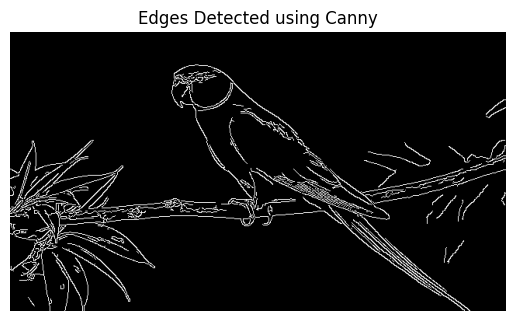

In [11]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

edges = cv2.Canny(gray_image, 100, 200)


plt.imshow(edges, cmap='gray')
plt.axis('off')
plt.title('Edges Detected using Canny')
plt.show()


# **Image Processing Application for Smart Surveillance System**

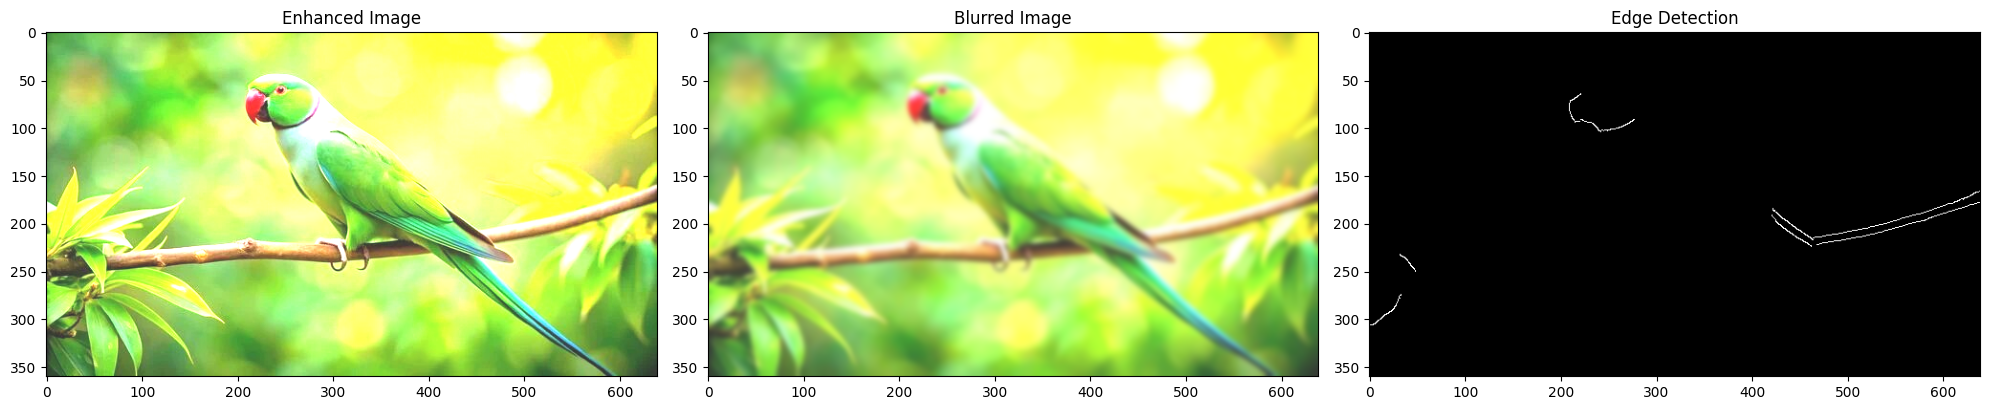

In [12]:
enhanced_image = cv2.convertScaleAbs(image, alpha=1.5, beta=50)


blurred_image = cv2.GaussianBlur(enhanced_image, (15, 15), 0)


gray_image = cv2.cvtColor(blurred_image, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray_image, 100, 200)

fig, ax = plt.subplots(1, 3, figsize=(20, 5))

ax[0].imshow(cv2.cvtColor(enhanced_image, cv2.COLOR_BGR2RGB))
ax[0].set_title('Enhanced Image')

ax[1].imshow(cv2.cvtColor(blurred_image, cv2.COLOR_BGR2RGB))
ax[1].set_title('Blurred Image')

ax[2].imshow(edges, cmap='gray')
ax[2].set_title('Edge Detection')

plt.tight_layout()
plt.show()


# **Analyze and Visualize Image Histograms**

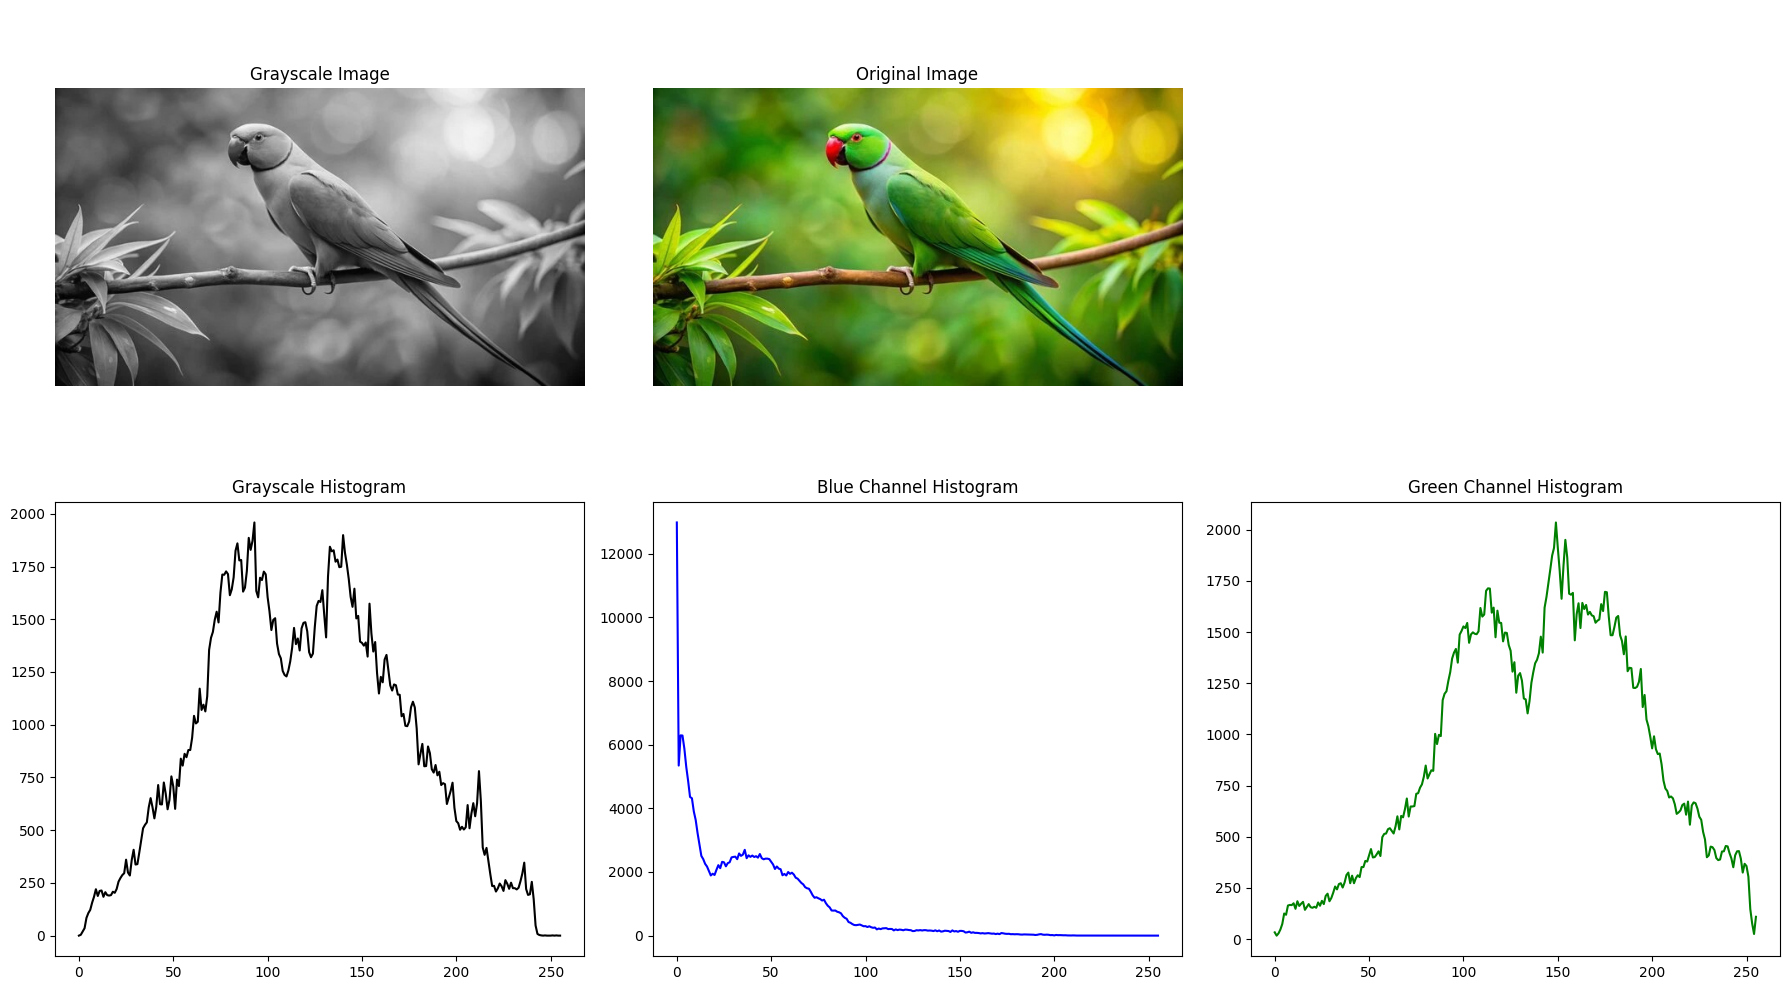

In [13]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

hist_gray = cv2.calcHist([gray_image], [0], None, [256], [0, 256])
hist_blue = cv2.calcHist([image], [0], None, [256], [0, 256])
hist_green = cv2.calcHist([image], [1], None, [256], [0, 256])


fig, ax = plt.subplots(2, 3, figsize=(18, 10))

ax[0, 0].imshow(gray_image, cmap='gray')
ax[0, 0].set_title('Grayscale Image')
ax[0, 0].axis('off')

ax[0, 1].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
ax[0, 1].set_title('Original Image')
ax[0, 1].axis('off')

ax[0, 2].axis('off')

ax[1, 0].plot(hist_gray, color='black')
ax[1, 0].set_title('Grayscale Histogram')

ax[1, 1].plot(hist_blue, color='blue')
ax[1, 1].set_title('Blue Channel Histogram')

ax[1, 2].plot(hist_green, color='green')
ax[1, 2].set_title('Green Channel Histogram')

plt.tight_layout()
plt.show()


# **Linear Spatial Filtering**

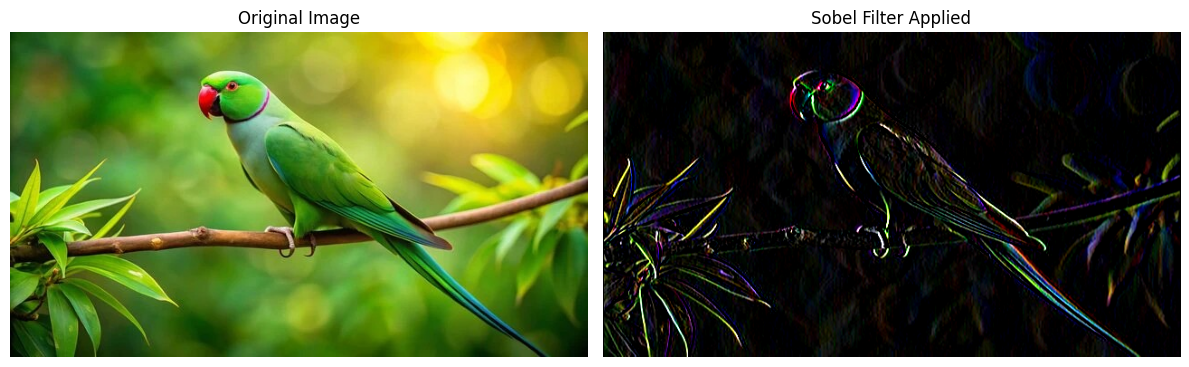

In [14]:
sobel_kernel = np.array([[-1, 0, 1],
                         [-2, 0, 2],
                         [-1, 0, 1]])

sobel_filtered_image = cv2.filter2D(image, -1, sobel_kernel)


fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ax[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
ax[0].set_title('Original Image')
ax[0].axis('off')

ax[1].imshow(cv2.cvtColor(sobel_filtered_image, cv2.COLOR_BGR2RGB))
ax[1].set_title('Sobel Filter Applied')
ax[1].axis('off')

plt.tight_layout()
plt.show()
